In [1]:
%matplotlib inline



Feature Extraction for Denoising: Clean and Noisy Audio
=======================================================

This notebook offers an example for how you can use PySoundTool to extract
acoustic features from clean and noisy datasets, and save them to .npy files.



Ignore this snippet of code: it is only for this example



In [2]:
import os
os.chdir('../../../')

Let's import pysoundtool, assuming it is in your working directory:



In [3]:
import pysoundtool as pyst

/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Using TensorFlow backend.
/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of typ

# Prepare for Extraction: Data Organization

### PySoundTool offers example datasets. Let's use them.


In [4]:
# Example noisy data:
data_noisy_dir = './audiodata/minidatasets/denoise/noisy/'
# Example clean data:
data_clean_dir = './audiodata/minidatasets/denoise/clean/'
# Where to save extracted features:
data_features_dir = './audiodata/example_feats_models/denoiser/'

### Which type of feature:

We can also extract 'mfcc', 'powspec', and 'stft'


In [5]:
feature_type = 'fbank'

### how much audio in seconds used from each audio file:



In [6]:
dur_sec = 3

### How many sections should each sample be broken into? (optional)



In [7]:
frames_per_sample = 11

# Built-In Functionality: PySoundTool does everything for you

### Define which data to use and which features to extract

Everything else is based on defaults. A feature folder with
the feature data will be created in the current working directory.

(Although, you can set this under the parameter `data_features_dir`)

/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/pysoundtool/data.py:400: UserWarning: Some files did not match those acceptable by this program. (i.e. non-audio files) The number of files removed: 3
  warnings.warn(message)


100% through train fbank clean feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m11s270ms/train_data_clean_fbank.npy

100% through val fbank clean feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m11s270ms/val_data_clean_fbank.npy

100% through test fbank clean feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m11s270ms/test_data_clean_fbank.npy

100% through train fbank noisy feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m11s270ms/train_data_noisy_fbank.npy

100% through val fbank noisy feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m11s270ms/val_data_noisy_fbank.npy

100% through test fbank noisy feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m11s270ms/test_data_noisy_fba

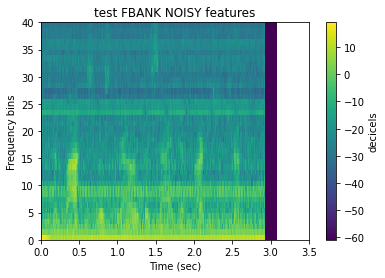

In [8]:
extraction_dir = pyst.denoiser_feats(data_clean_dir = data_clean_dir, 
                                     data_noisy_dir = data_noisy_dir,
                                     feature_type = feature_type, 
                                     dur_sec = dur_sec,
                                     frames_per_sample = frames_per_sample,
                                     visualize=True)

### Where to find the data?

The extracted features, extraction settings applied, and which audio files were assigned to which datasets will be saved in the following directory:



In [9]:
print(extraction_dir)

audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m11s270ms


### And that's it!



## A bit more hands-on (PySoundTool does a bit for you)

### Create unique directory for feature extraction session

This avoids accidental overwriting of data.

In [10]:
feat_extraction_dir = 'features_'+feature_type + '_' + pyst.utils.get_date()

### Ensure clean and noisy data directories exist and turn into pathlib.PosixPath objects

Pathlib allows you to work with pathways from various operating systems.



In [11]:
audio_clean_path = pyst.utils.check_dir(data_clean_dir, make=False)
audio_noisy_path = pyst.utils.check_dir(data_noisy_dir, make=False)

In [12]:
print(type(audio_clean_path))

<class 'pathlib.PosixPath'>


### Create directory for what we need to save:



In [13]:
denoise_data_path = pyst.utils.check_dir(data_features_dir, make=True)
feat_extraction_dir = denoise_data_path.joinpath(feat_extraction_dir)
feat_extraction_dir = pyst.utils.check_dir(feat_extraction_dir, make=True)

### Create paths to save noisy train, val, and test datasets



In [14]:
data_train_noisy_path = feat_extraction_dir.joinpath('{}_data_{}_{}.npy'.format('train',
                                                                        'noisy',
                                                                    feature_type))
data_val_noisy_path = feat_extraction_dir.joinpath('{}_data_{}_{}.npy'.format('val',
                                                                    'noisy',
                                                                    feature_type))
data_test_noisy_path = feat_extraction_dir.joinpath('{}_data_{}_{}.npy'.format('test',
                                                                    'noisy',
                                                                    feature_type))

In [15]:
print(data_train_noisy_path)

audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m19s67ms/train_data_noisy_fbank.npy


### Create paths to save clean train, val, and test datasets



In [16]:
data_train_clean_path = feat_extraction_dir.joinpath('{}_data_{}_{}.npy'.format('train',
                                                                        'clean',
                                                                    feature_type))
data_val_clean_path = feat_extraction_dir.joinpath('{}_data_{}_{}.npy'.format('val',
                                                                    'clean',
                                                                    feature_type))
data_test_clean_path = feat_extraction_dir.joinpath('{}_data_{}_{}.npy'.format('test',
                                                                    'clean',
                                                                    feature_type))

In [17]:
print(data_train_clean_path)

audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m19s67ms/train_data_clean_fbank.npy


### Collect audiofiles and divide them into train, val, and test datasets



### noisy data



In [18]:
noisyaudio = pyst.utils.collect_audiofiles(audio_noisy_path, 
                                                hidden_files = False,
                                                wav_only = False,
                                                recursive = False)
# sort audio (can compare if noisy and clean datasets are compatible)
noisyaudio = sorted(noisyaudio)

In [19]:
print(noisyaudio[:5])

[PosixPath('audiodata/minidatasets/denoise/noisy/S_01_01_cafe_snr0.wav'), PosixPath('audiodata/minidatasets/denoise/noisy/S_01_02_traffic_snr0.wav'), PosixPath('audiodata/minidatasets/denoise/noisy/S_01_03_cafe_snr-5.wav'), PosixPath('audiodata/minidatasets/denoise/noisy/S_01_04_cafe_snr15.wav'), PosixPath('audiodata/minidatasets/denoise/noisy/S_01_05_cafe_snr-5.wav')]


### clean data



In [20]:
cleanaudio = pyst.utils.collect_audiofiles(audio_clean_path, 
                                                hidden_files = False,
                                                wav_only = False,
                                                recursive = False)
cleanaudio = sorted(cleanaudio)

### Check if they match up: (expects clean file name to be in noisy file name)



In [21]:
for i, audiofile in enumerate(noisyaudio):
    if not pyst.utils.check_noisy_clean_match(audiofile, cleanaudio[i]):
        raise ValueError('The noisy and clean audio datasets do not appear to match.')

### Save collected audiofiles for noisy and clean datasets to dictionary



In [22]:
noisy_audio_dict = dict([('noisy', noisyaudio)])
clean_audio_dict = dict([('clean', cleanaudio)])

### Separate into datasets, with random seed set so noisy and clean data match



### first noisy data



In [23]:
train_noisy, val_noisy, test_noisy = pyst.data.audio2datasets(noisy_audio_dict,
                                                              perc_train=0.8,
                                                              seed=40)

### then clean data (order doesn't matter)



In [24]:
train_clean, val_clean, test_clean = pyst.data.audio2datasets(clean_audio_dict,
                                                              perc_train=0.8,
                                                              seed=40)

### save train, val, test dataset assignments to dict



In [25]:
dataset_dict_noisy = dict([('train', train_noisy),('val', val_noisy),('test', test_noisy)])
dataset_dict_clean = dict([('train', train_clean),('val', val_clean),('test', test_clean)])

### keep track of paths to save data, once features have been extracted

Save the paths to save feature data to a dict with the same keys.


### noisy data paths



In [26]:
dataset_paths_noisy_dict = dict([('train',data_train_noisy_path),
                                ('val', data_val_noisy_path),
                                ('test',data_test_noisy_path)])

### clean data paths



In [27]:
dataset_paths_clean_dict = dict([('train',data_train_clean_path),
                                ('val', data_val_clean_path),
                                ('test',data_test_clean_path)])

### ensure the noisy and clean audio match up:



In [28]:
for key, value in dataset_dict_noisy.items():
    for j, audiofile in enumerate(value):
        if not pyst.utils.check_noisy_clean_match(audiofile,
                                                dataset_dict_clean[key][j]):
            raise ValueError('There is a mismatch between noisy and clean audio. '+\
                '\nThe noisy file:\n{}'.format(dataset_dict_noisy[key][i])+\
                    '\ndoes not seem to match the clean file:\n{}'.format(audiofile))

# Visualize Audio Samples and Features



### for fun, let's visualize the audio:



### first noisy audio sample in its raw signal



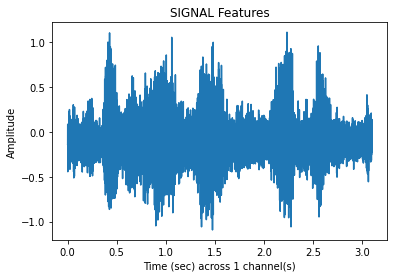

In [29]:
pyst.plotsound(noisyaudio[0], feature_type='signal')

### first clean audio sample in its raw signal



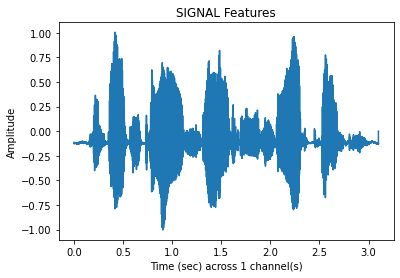

In [30]:
pyst.plotsound(cleanaudio[0], feature_type='signal')

### visualize the features that will be extracted



### first noisy audio sample



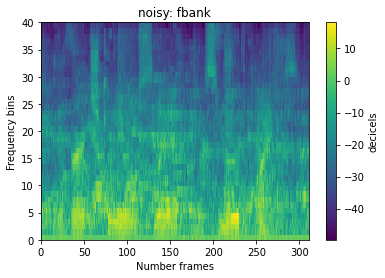

In [31]:
pyst.plotsound(noisyaudio[0], feature_type=feature_type, power_scale='power_to_db',
              title = noisyaudio[0].parent.stem + ': '+ feature_type)

first clean audio sample



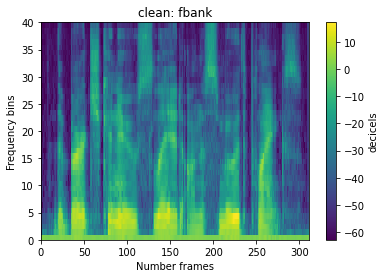

In [32]:
pyst.plotsound(cleanaudio[0], feature_type=feature_type, power_scale='power_to_db',
              title = cleanaudio[0].parent.stem + ': '+ feature_type)

## Extract and Save Features


In [33]:
import time
start = time.time()

### extract clean data first (again, order doesn't matter)



100% through train fbank clean feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m19s67ms/train_data_clean_fbank.npy

100% through val fbank clean feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m19s67ms/val_data_clean_fbank.npy

100% through test fbank clean feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m19s67ms/test_data_clean_fbank.npy



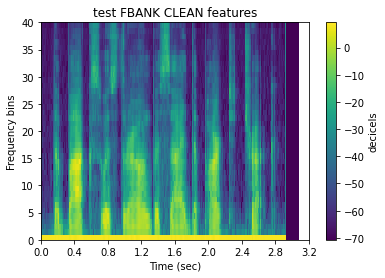

In [34]:
dataset_dict_clean, dataset_paths_clean_dict = pyst.feats.save_features_datasets(
    datasets_dict = dataset_dict_clean,
    datasets_path2save_dict = dataset_paths_clean_dict,
    feature_type = feature_type + ' clean',
    dur_sec = dur_sec,
    frames_per_sample = frames_per_sample,
    win_size_ms = 16,
    visualize=True, # saves plots of features
    vis_every_n_frames=200) # limits how often plots are generated

### then noisy data



100% through train fbank noisy feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m19s67ms/train_data_noisy_fbank.npy

100% through val fbank noisy feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m19s67ms/val_data_noisy_fbank.npy

100% through test fbank noisy feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m19s67ms/test_data_noisy_fbank.npy


Finished! Total duration: 9.24 seconds.

Features can be found here:
audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m19s67ms


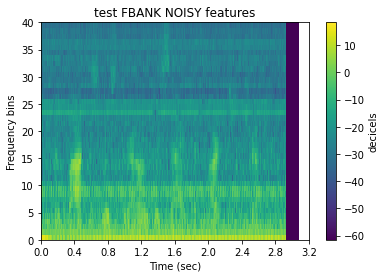

In [35]:
dataset_dict_noisy, dataset_paths_noisy_dict = pyst.feats.save_features_datasets(
    datasets_dict = dataset_dict_noisy,
    datasets_path2save_dict = dataset_paths_noisy_dict,
    feature_type = feature_type + ' noisy',
    dur_sec = dur_sec,
    frames_per_sample = frames_per_sample,
    win_size_ms = 16,
    visualize=True, # saves plots of features 
    vis_every_n_frames=200) # limits how often plots are generated
end = time.time()

total_dur_sec = round(end-start,2)
total_dur, units = pyst.utils.adjust_time_units(total_dur_sec)
print('\nFinished! Total duration: {} {}.'.format(total_dur, units))
print('\nFeatures can be found here:')
print(feat_extraction_dir)

Have a look in `feat_extraction_dir` and there will be your features.



## Logging Dataset Audio Assignments


#### In order to keep track of which audio files were assigned to each dataset file, you can save this information so:



In [36]:
filename = feat_extraction_dir.joinpath('Noisy_Dataset_Assignments.csv')
noisy_datasets_dict_paths = pyst.utils.save_dict(dataset_dict_noisy, 
                                                 filename = filename)

filename = feat_extraction_dir.joinpath('Clean_Dataset_Assignments.csv')
clean_datasets_dict_paths = pyst.utils.save_dict(dataset_dict_clean, 
                                                 filename = filename)

You will find these files in the `feat_extraction_dir`.



## Large Datasets

If you have very large amounts of audio you would like to process, you can 
divide the datasets into smaller sections:



In [37]:
dataset_dict_clean, dataset_paths_clean_dict = pyst.feats.save_features_datasets(
    datasets_dict = dataset_dict_clean,
    datasets_path2save_dict = dataset_paths_clean_dict,
    feature_type = feature_type + ' clean',
    dur_sec = dur_sec,
    frames_per_sample = frames_per_sample,
    win_size_ms = 16,
    subsection_data = True, # if you want to subsection at least largest dataset
    divide_factor = 10) # how many times you want the data to be sectioned.

100% through train__1 fbank clean feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m19s67ms/train_data_clean_fbank__1.npy

100% through train__2 fbank clean feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m19s67ms/train_data_clean_fbank__2.npy

100% through train__3 fbank clean feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m19s67ms/train_data_clean_fbank__3.npy

100% through train__4 fbank clean feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m19s67ms/train_data_clean_fbank__4.npy

100% through train__5 fbank clean feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank_6m22d2h50m19s67ms/train_data_clean_fbank__5.npy

100% through train__6 fbank clean feature extraction
Features saved at audiodata/example_feats_models/denoiser/features_fbank